# **PIP INSTALL**

In [1]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 2.8 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!pip install stopwords

In [4]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00


In [5]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=c14d5d2c3f5ac5ddbb748ab56edc2411e40f98ca1659c7d32a891b2e00c8c529
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [80]:
pip install mlxtend

In [6]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Import library**

In [81]:
#pip install  Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
import plotly.express as px
from wordcloud import WordCloud

from mlxtend.plotting import plot_confusion_matrix

# Set style for plots
sns.set_style("whitegrid")
sns.despine()

plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


<Figure size 640x480 with 0 Axes>

In [11]:
from google.colab import files
uploaded=files.upload()

Saving cyberbullying_tweets.csv to cyberbullying_tweets.csv


In [12]:
# Set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

<ipython-input-12-44e6fe2aeab7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [13]:
df=pd.read_csv('cyberbullying_tweets.csv')#shot
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


## **Renaming Columns**

In [14]:

df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
df

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


### **Removing Duplicate files**

In [15]:
df.duplicated().sum() #Total no of duplicate files

36

In [16]:
df = df[~df.duplicated()]

In [17]:
df.duplicated().sum()

0

## Cleaning Text

In [19]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.demojize(text)


# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [20]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]

<ipython-input-20-ec319735368f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]


In [21]:
df.drop_duplicates("text_clean", inplace=True)
df = df[df["sentiment"]!="other_cyberbullying"]

<ipython-input-21-dd9b12871b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates("text_clean", inplace=True)


In [24]:
le = LabelEncoder()
le.fit(df['sentiment'])
df['le_sentiment'] = le.transform(df['sentiment'])
df

,text,sentiment,text_clean,le_sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,3
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt nigger fucking unfollow fucking du...,1


In [25]:
df.sentiment.value_counts()

religion             7913
age                  7819
ethnicity            7426
gender               7286
not_cyberbullying    6094
Name: sentiment, dtype: int64

In [26]:
df.le_sentiment.value_counts()

4    7913
0    7819
1    7426
2    7286
3    6094
Name: le_sentiment, dtype: int64

religion             7913
age                  7819
ethnicity            7426
gender               7286
not_cyberbullying    6094
Name: sentiment, dtype: int64


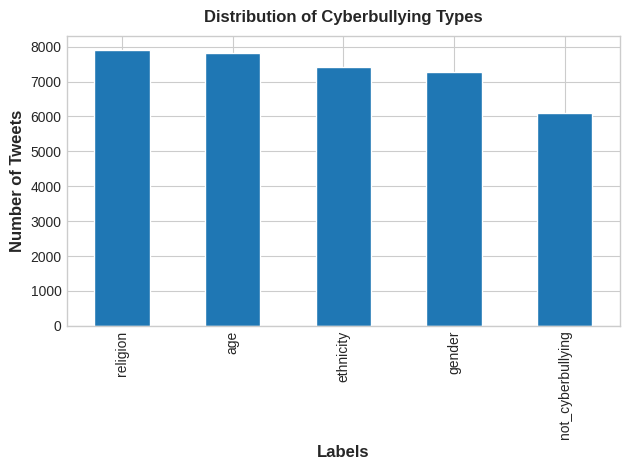

In [27]:
# Assuming 'sentiment' is the column containing the sentiment categories
class_counts = df['sentiment'].value_counts()

# Display the count values
print(class_counts)

# Plot the counts
class_counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()


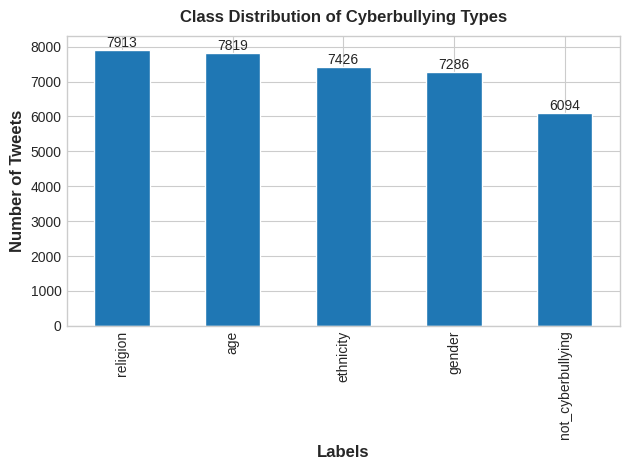

In [28]:
# Assuming 'sentiment' is the column containing the sentiment categories
class_counts = df['sentiment'].value_counts()

# Plot the counts
ax = class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')

# Add count values inside the bars
for i, count in enumerate(class_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()


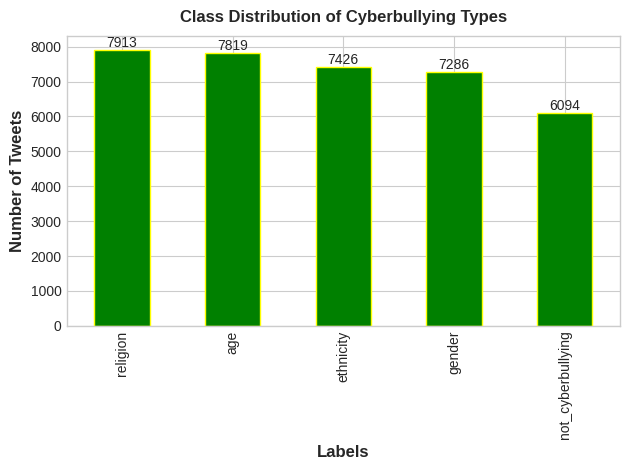

In [29]:
# Assuming 'sentiment' is the column containing the sentiment categories
class_counts = df['sentiment'].value_counts()

# Plot the counts with customized colors
ax = class_counts.plot(kind='bar', color='green', edgecolor='yellow')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')

# Add count values inside the bars
for i, count in enumerate(class_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()


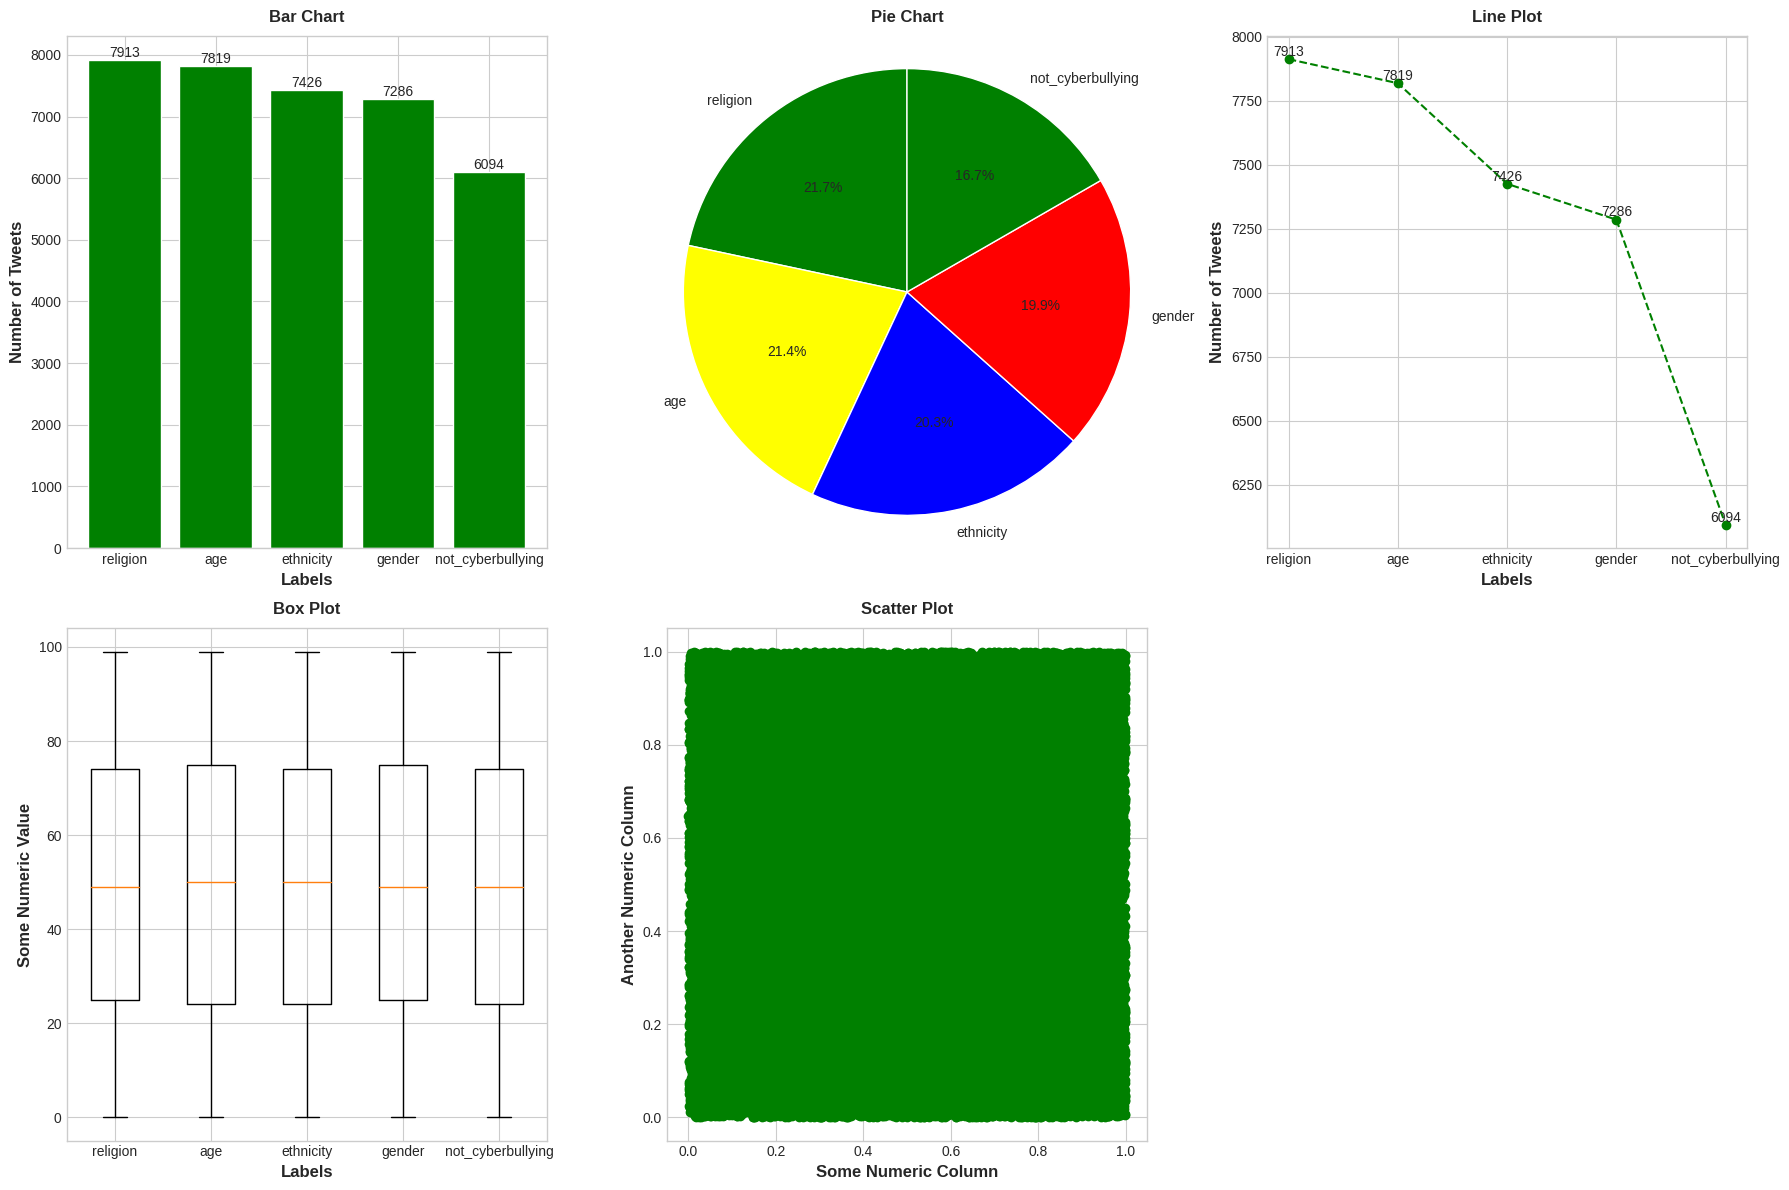

In [30]:
# Assuming 'sentiment' is the column containing the sentiment categories
class_counts = df['sentiment'].value_counts()

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Bar chart
axs[0, 0].bar(class_counts.index, class_counts, color='green')
axs[0, 0].set_title('Bar Chart')
axs[0, 0].set_xlabel('Labels')
axs[0, 0].set_ylabel('Number of Tweets')
for i, v in enumerate(class_counts):
    axs[0, 0].text(i, v + 1, str(v), ha='center', va='bottom')

# Pie chart
axs[0, 1].pie(class_counts, labels=class_counts.index, startangle=90, colors=['green', 'yellow', 'blue', 'red'], autopct='%1.1f%%')
axs[0, 1].set_title('Pie Chart')
axs[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Line plot
axs[0, 2].plot(class_counts.index, class_counts, marker='o', color='green', linestyle='dashed')
axs[0, 2].set_title('Line Plot')
axs[0, 2].set_xlabel('Labels')
axs[0, 2].set_ylabel('Number of Tweets')
for i, v in enumerate(class_counts):
    axs[0, 2].text(i, v + 1, str(v), ha='center', va='bottom')

# Box plot (using random data for demonstration)
data = [np.random.randint(0, 100, size=class_counts[name]) for name in class_counts.index]
axs[1, 0].boxplot(data, labels=class_counts.index)
axs[1, 0].set_title('Box Plot')
axs[1, 0].set_xlabel('Labels')
axs[1, 0].set_ylabel('Some Numeric Value')

# Scatter plot (using random data for demonstration)
x = np.random.rand(len(df))
y = np.random.rand(len(df))
axs[1, 1].scatter(x, y, c='green', marker='o')
axs[1, 1].set_title('Scatter Plot')
axs[1, 1].set_xlabel('Some Numeric Column')
axs[1, 1].set_ylabel('Another Numeric Column')

# Hide the last subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()




#shot

In [32]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()


In [33]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]


In [34]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words


[('I', 13809),
 ('school', 6559),
 ('like', 4723),
 ('high', 4554),
 ('bullied', 4056),
 ('dumb', 3988),
 ('people', 3433),
 ('RT', 3124),
 ('u', 3013),
 ('rape', 2897),
 ('fuck', 2764),
 ('gay', 2617),
 ('one', 2571),
 ('&amp;', 2379),
 ('girls', 2329),
 ('The', 2328),
 ('You', 2299),
 ('bully', 2280),
 ('girl', 2227),
 ('nigger', 2218),
 ('get', 2165),
 ('ass', 2140),
 ('jokes', 1998),
 ('black', 1839),
 ("I'm", 1811),
 ('know', 1790),
 ('would', 1735),
 ('think', 1718),
 ('white', 1589),
 ('Muslim', 1409),
 ('say', 1407),
 ('call', 1406),
 ('got', 1392),
 ('Muslims', 1376),
 ('called', 1348),
 ('make', 1338),
 ('even', 1299),
 ('FUCK', 1273),
 ('And', 1271),
 ('ur', 1248),
 ('never', 1193),
 ('see', 1174),
 ('go', 1145),
 ('Christian', 1144),
 ('still', 1139),
 ('want', 1107),
 ('If', 1100),
 ('joke', 1100),
 ('This', 1092),
 ('A', 1089),
 ('bullies', 1080),
 ('support', 1077),
 ('-', 1068),
 ('said', 1060),
 ('women', 1055),
 ('right', 1045),
 ('bitch', 1043),
 ('really', 1042),
 (

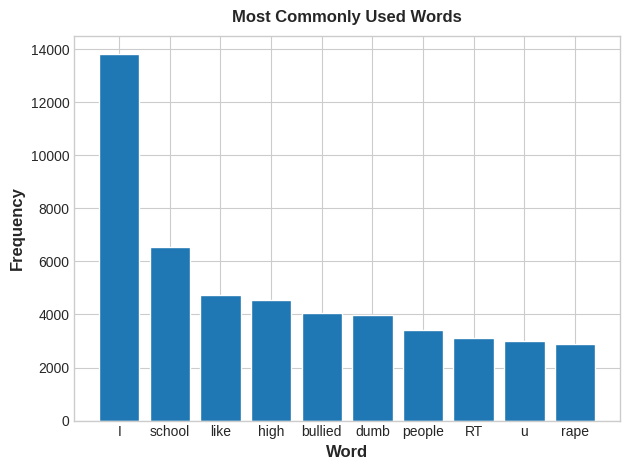

In [35]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [37]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['text_clean'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [38]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [39]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(200)
top_words

[('school', 8936),
 ('fuck', 5438),
 ('girl', 5403),
 ('like', 5374),
 ('nigger', 5138),
 ('joke', 5104),
 ('people', 4983),
 ('high', 4970),
 ('dumb', 4840),
 ('muslim', 4728),
 ('bully', 4528),
 ('bullied', 4417),
 ('gay', 4119),
 ('rape', 4020),
 ('one', 3441),
 ('rt', 3210),
 ('idiot', 3173),
 ('woman', 2982),
 ('black', 2798),
 ('would', 2693),
 ('get', 2691),
 ('amp', 2387),
 ('know', 2349),
 ('bitch', 2340),
 ('white', 2230),
 ('christian', 2126),
 ('right', 2118),
 ('mkr', 2089),
 ('say', 2045),
 ('think', 2025),
 ('make', 1976),
 ('call', 1800),
 ('want', 1743),
 ('go', 1647),
 ('got', 1625),
 ('time', 1535),
 ('even', 1492),
 ('called', 1425),
 ('terrorist', 1424),
 ('shit', 1391),
 ('see', 1373),
 ('never', 1370),
 ('year', 1317),
 ('really', 1286),
 ('going', 1281),
 ('thing', 1280),
 ('support', 1279),
 ('islam', 1274),
 ('first', 1269),
 ('islamic', 1265),
 ('still', 1256),
 ('fucking', 1239),
 ('said', 1216),
 ('female', 1183),
 ('hate', 1176),
 ('man', 1139),
 ('anythin

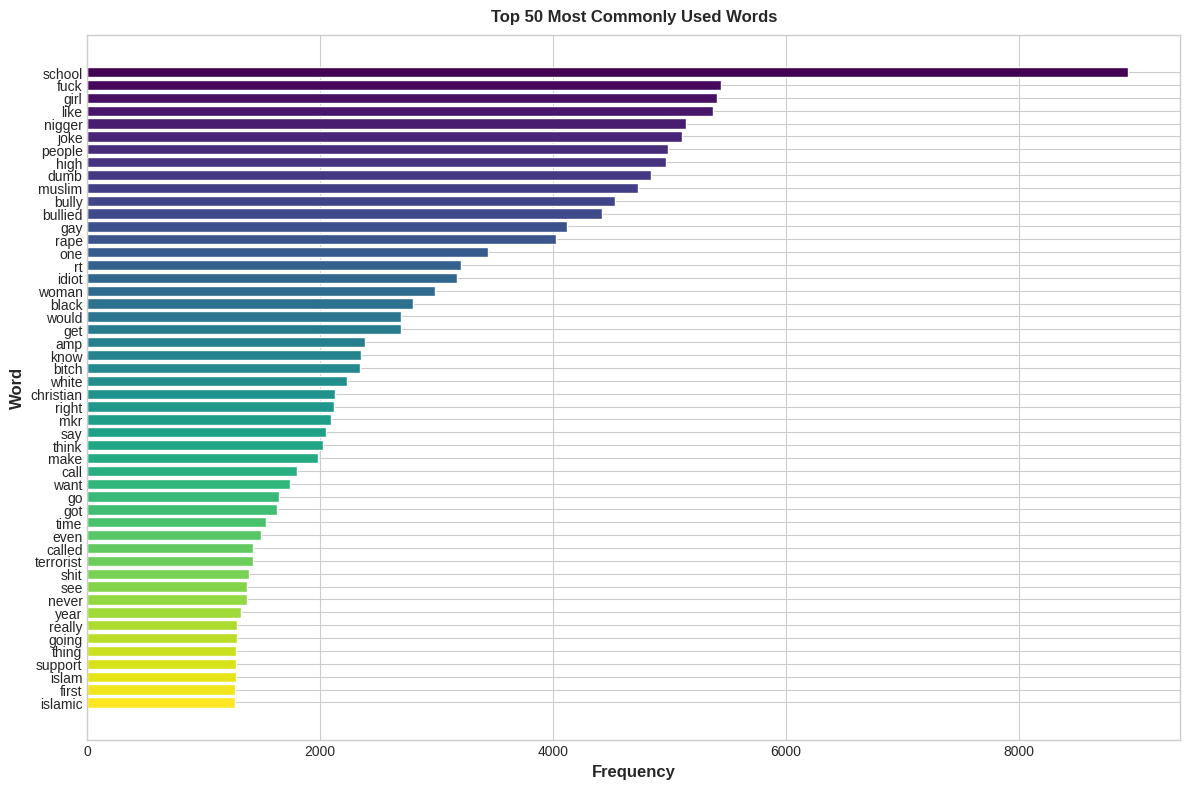

In [40]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(50)  # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

# Customizing the color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# Create a horizontal bar chart with a custom color palette
plt.figure(figsize=(12, 8))
plt.barh(x_values, y_values, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 50 Most Commonly Used Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common words at the top
plt.show()

#shot


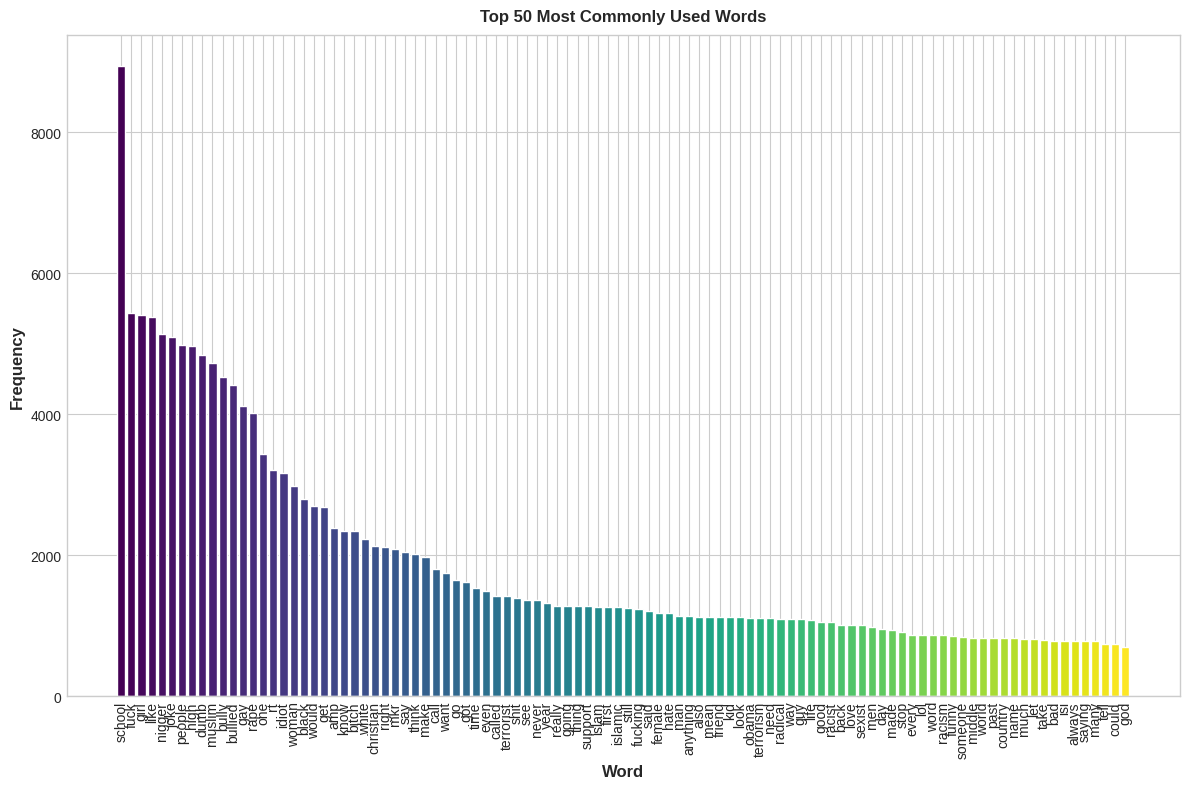

In [41]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(100)  # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

# Customizing the color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# Create a vertical bar chart with a custom color palette
plt.figure(figsize=(12, 8))
plt.bar(x_values, y_values, color=colors)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Most Commonly Used Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [42]:
# Plotting the top 15 words of each cyberbullying type
for cyber_type in df.sentiment.unique():

    top50_word = df.text_clean[df.sentiment==cyber_type].str.split(expand=True).stack().value_counts()[:15]

    fig = px.bar(top50_word, color=top50_word.index, color_discrete_map={word: f"rgb({i*10}, {i*20}, {i*30})" for i, word in enumerate(top50_word.index)})
    fig.update_traces(marker_color='lightblue')
    fig.update_traces(hovertemplate='<b>Count: </b>%{y}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='plotly',
                    # Set background color here
                     hovermode='x unified')
    fig.show()




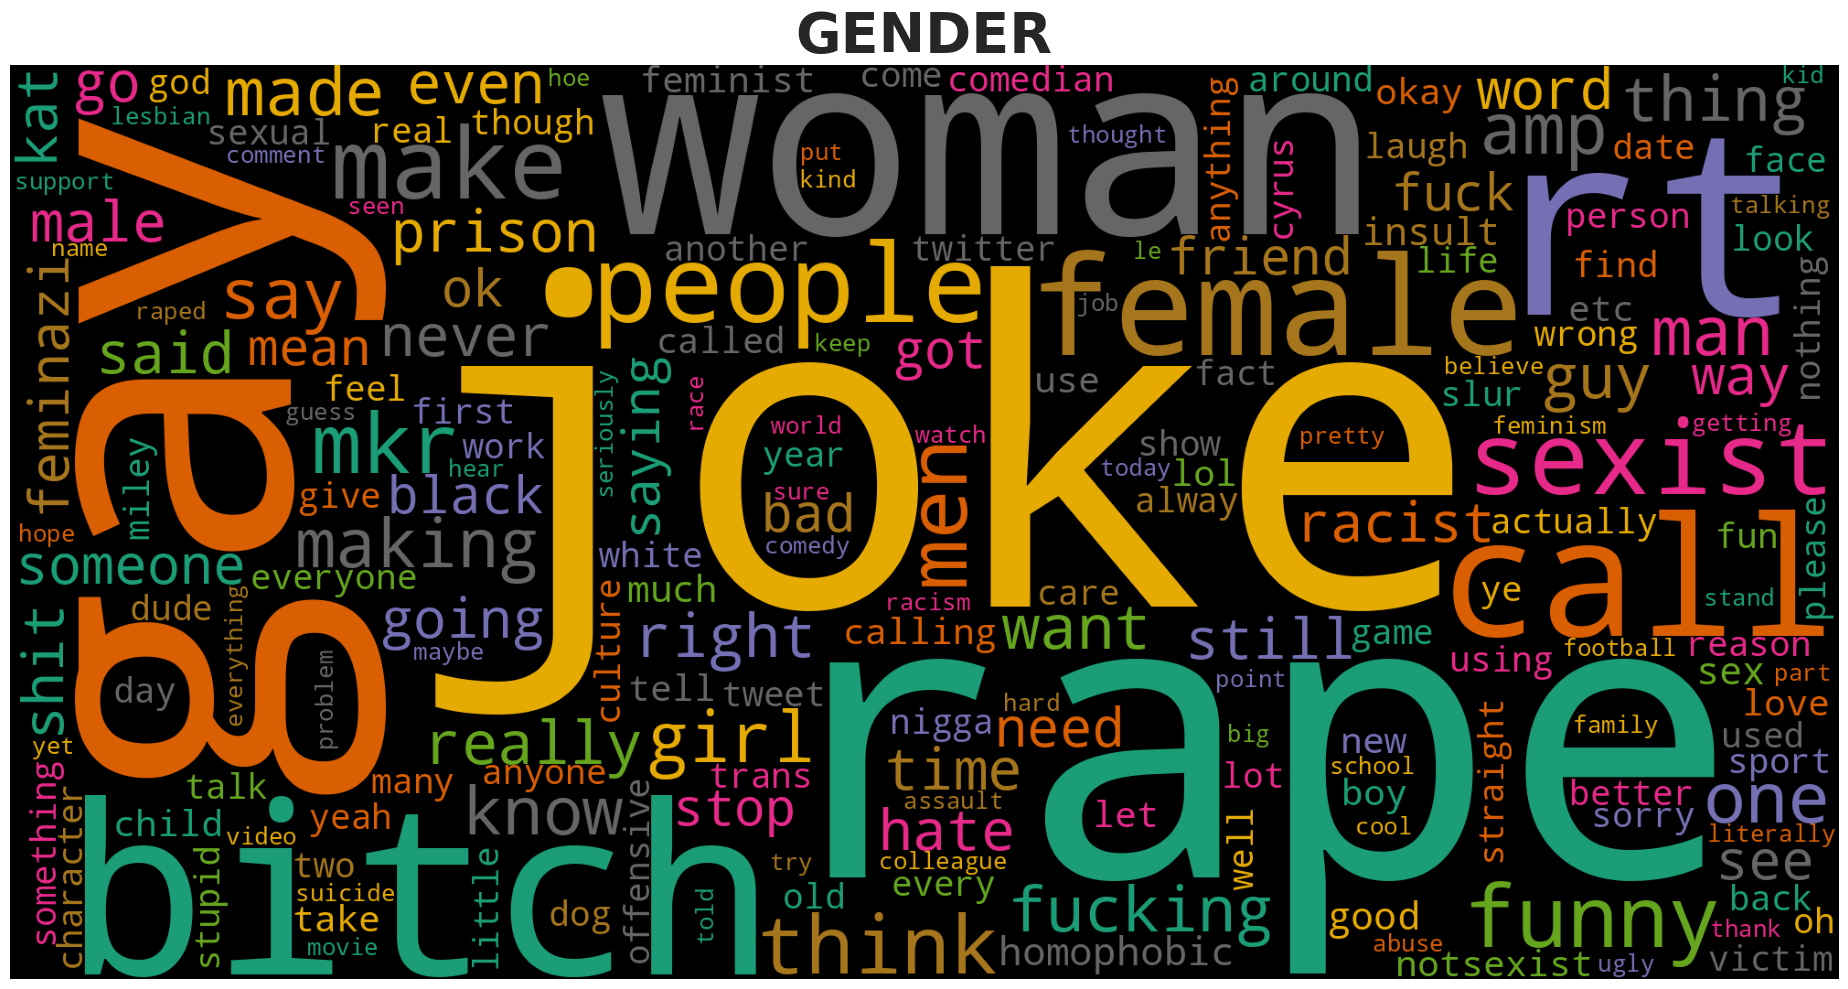

In [113]:
plt.figure(figsize=(20,10))
subset1 = df[df['sentiment']=='gender']
text_gender = subset1.text_clean.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("GENDER",fontsize=40)
plt.imshow(cloud1)

#shot

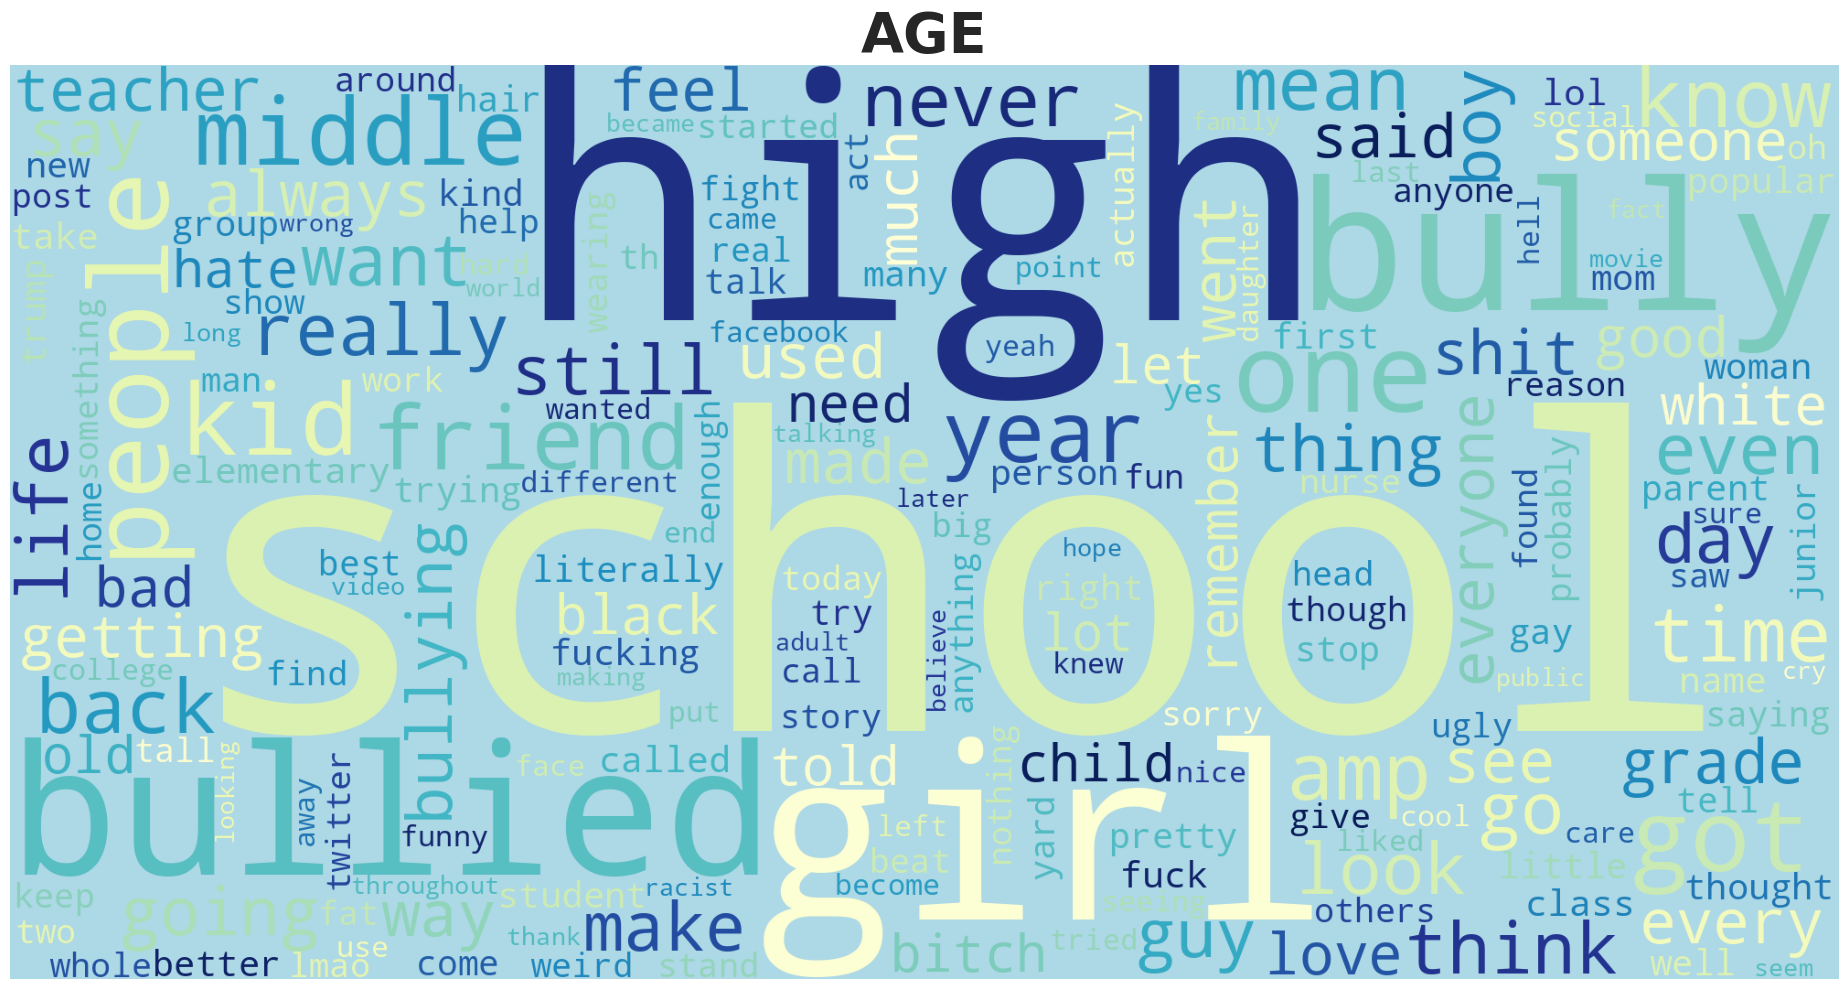

In [114]:
plt.figure(figsize=(20,10))
subset1 = df[df['sentiment']=='age']
text_age = subset1.text_clean.values
c=WordCloud(background_color='lightblue',colormap="YlGnBu",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("AGE",fontsize=40)
plt.imshow(c)

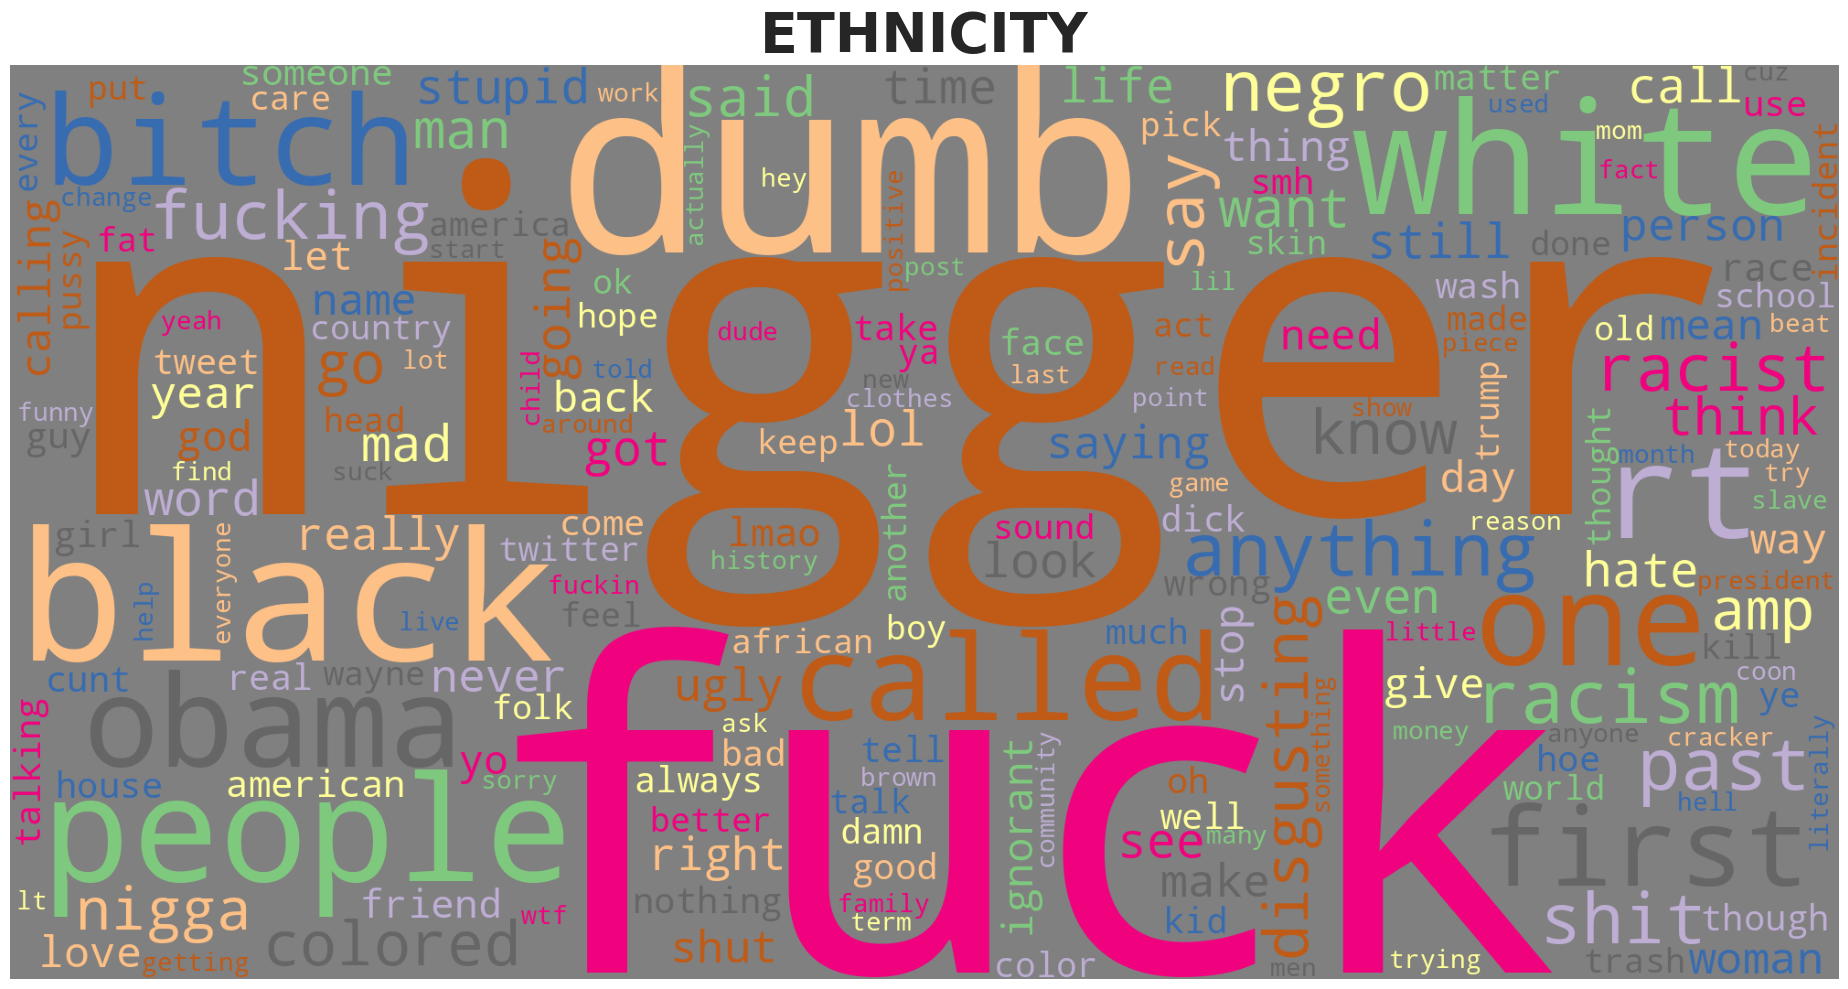

In [115]:
plt.figure(figsize=(20,10))
subset1 = df[df['sentiment']=='ethnicity']
text_ethnicity = subset1.text_clean.values
c=WordCloud(background_color='gray',colormap="Accent",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("ETHNICITY",fontsize=40)
plt.imshow(c)

# **Train test split**

In [52]:
X = df['text_clean']
y = df['le_sentiment']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [54]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6255],
       [   1, 5941],
       [   2, 5829],
       [   3, 4875],
       [   4, 6330]])

## **Oversampling of training set**

In [55]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['text_clean', 'sentiment']);

In [56]:
X_train = train_os['text_clean'].values
y_train = train_os['sentiment'].values

# Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [59]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [60]:
nb_clf = MultinomialNB()

In [61]:
nb_clf.fit(X_train_tf, y_train)
#shot

MultinomialNB()

In [62]:
nb_pred = nb_clf.predict(X_test_tf)
#shot

In [63]:
# Naive Bayes Score
nb_clf.score(X_test_tf,y_test)
#shot

0.8567323481116584

In [64]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1564
           1       0.90      0.91      0.91      1485
           2       0.89      0.85      0.87      1457
           3       0.81      0.50      0.62      1219
           4       0.86      0.96      0.91      1583

    accuracy                           0.86      7308
   macro avg       0.85      0.84      0.84      7308
weighted avg       0.86      0.86      0.85      7308



In [66]:
conf = confusion_matrix(y_test,nb_pred)

array([[1531,    8,    5,   13,    7],
       [  62, 1350,   12,    8,   53],
       [  39,   36, 1243,  106,   33],
       [ 241,   94,  119,  613,  152],
       [  17,   10,   11,   21, 1524]])

In [85]:
unique_classes = sorted(set(y_test))

In [102]:
y_test

18185    4
20395    4
670      3
2324     3
34524    0
        ..
31919    0
32045    0
11434    2
44665    1
11777    2
Name: le_sentiment, Length: 7308, dtype: int64

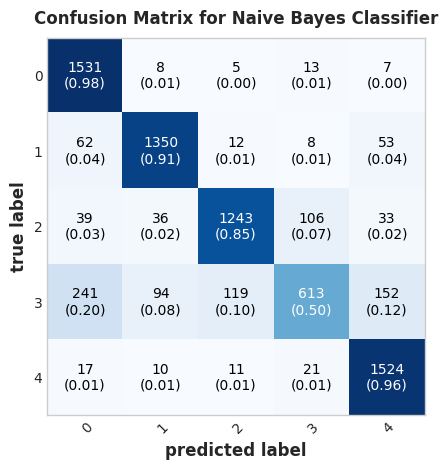

In [86]:
# Plot confusion matrix
conf = confusion_matrix(y_test,nb_pred)
plot_confusion_matrix(conf_mat=conf,class_names=unique_classes,show_normed=True)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

#shot

## Naive bayes and countvectorizer pipeline

Predicting text using Naive bayes model

In [88]:
from sklearn.pipeline import Pipeline
clfs = Pipeline([
    ('vectorizer', CountVectorizer()),

    ('nb', MultinomialNB())
])

In [89]:
clfs.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [90]:
clfs.score(X_test,y_test)
#shot

0.8737000547345375

In [91]:
a=clfs.predict(["@abc Man you don't have any facial hair You look like a fucking 9 year old school boy! #clown #idiot"])
mapping = {
    0: 'Age',
    1: 'ethnicity',
    2: 'Gender',
    3: 'not_cyberbullying',
    4: 'Religion',
}



for i in a:
    print(mapping.get(i, 'Unknown'))

Age


In [92]:
b=clfs.predict(["childern are happy and they are below two years"])
mapping = {
    0: 'Age',
    1: 'ethnicity',
    2: 'Gender',
    3: 'not_cyberbullying',
    4: 'Religion',
}



for i in b:
    print(mapping.get(i, 'Unknown'))

not_cyberbullying


# **Random Forest Classifier**

In [93]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [94]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train_cv, y_train)

#shot

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [95]:
classifier.score(X_test_cv,y_test)

#shot

0.9168035030103996

In [96]:
rf_pred=classifier.predict(X_test_cv)

#shot

In [97]:
confusion_matrix(y_test,rf_pred)

array([[1521,    2,    8,   31,    2],
       [   5, 1445,    9,   17,    9],
       [   6,   14, 1241,  188,    8],
       [  31,   16,   99, 1029,   44],
       [   3,    7,   10,   99, 1464]])

In [98]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, rf_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1564
           1       0.97      0.97      0.97      1485
           2       0.91      0.85      0.88      1457
           3       0.75      0.84      0.80      1219
           4       0.96      0.92      0.94      1583

    accuracy                           0.92      7308
   macro avg       0.91      0.91      0.91      7308
weighted avg       0.92      0.92      0.92      7308



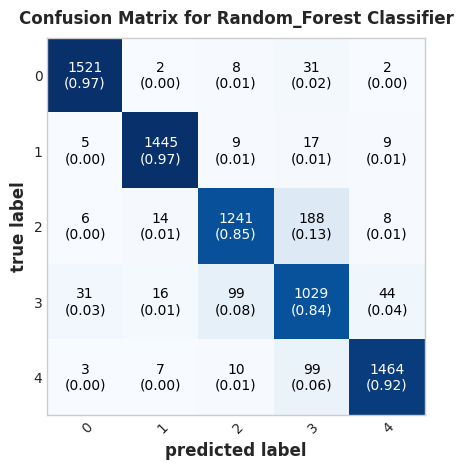

In [101]:
# Plot confusion matrix
conf = confusion_matrix(y_test,rf_pred)
plot_confusion_matrix(conf_mat=conf,class_names=unique_classes,show_normed=True)
plt.title('Confusion Matrix for Random_Forest Classifier')
plt.show()

#shot

## **Using Pipeline**

In [103]:
from sklearn.pipeline import Pipeline
Rf = Pipeline([
    ('vectorizer', CountVectorizer()),

    ('rfc',RandomForestClassifier(n_estimators= 10, criterion="entropy") )
])

In [104]:
Rf.fit(X_train,y_train)

#shot

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

In [105]:
Rf.score(X_test,y_test)

#shot

0.9225506294471811

In [108]:
r_pred=Rf.predict(["children are happy"])
mapping = {
    0: 'Age',
    1: 'ethnicity',
    2: 'Gender',
    3: 'not_cyberbullying',
    4: 'Religion',
}



for i in r_pred:
    print(mapping.get(i, 'Unknown'))

not_cyberbullying
